# MNIST Veri Seti - Exploratory Data Analysis (EDA)

Bu notebook, MNIST el yazısı rakam tanıma veri setinin detaylı analizini içerir.



## 1. Setup & Imports

Gerekli kütüphaneleri import ediyoruz ve ortamı hazırlıyoruz.


In [9]:
import sys
import os
sys.path.append("..")  # Üst dizine çıkıp src klasörüne erişim

import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# src modüllerini import et
from src.utils import load_config, set_seed
from src.data_loader import get_data_loaders, get_class_names

# Matplotlib ayarları
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 150

print("✅ Tüm kütüphaneler başarıyla yüklendi!")


✅ Tüm kütüphaneler başarıyla yüklendi!


In [10]:
# Config yükleme
config = load_config("../configs/config.yaml")

# Random seed ayarlama (reproducibility için)
set_seed(config.get("seed", 42))

# Figures dizinini oluştur
figures_dir = Path("../" + config["paths"]["figures_dir"])
figures_dir.mkdir(parents=True, exist_ok=True)

print(f"✅ Config yüklendi!")
print(f"✅ Figures dizini hazır: {figures_dir}")


✅ Random seed 42 olarak ayarlandı (reproducibility için)
✅ Config yüklendi!
✅ Figures dizini hazır: ..\outputs\figures


## 2. Veri Setini Yükleme

MNIST veri setini yüklüyoruz ve temel bilgileri inceliyoruz.


In [11]:
# Veri loader'ları oluştur
train_loader, val_loader, test_loader = get_data_loaders(config)

# Set boyutlarını hesapla
train_size = len(train_loader.dataset)
val_size = len(val_loader.dataset)
test_size = len(test_loader.dataset)
total_size = train_size + val_size + test_size

print("=" * 60)
print("VERİ SETİ BOYUTLARI")
print("=" * 60)
print(f"Train seti:      {train_size:6d} örnek ({train_size/total_size*100:.1f}%)")
print(f"Validation seti: {val_size:6d} örnek ({val_size/total_size*100:.1f}%)")
print(f"Test seti:       {test_size:6d} örnek ({test_size/total_size*100:.1f}%)")
print(f"{'─' * 60}")
print(f"Toplam:          {total_size:6d} örnek")
print("=" * 60)

# Batch sayıları
print(f"\nBatch sayıları:")
print(f"Train batches:      {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches:       {len(test_loader)}")


VERİ SETİ BOYUTLARI
Train seti:       54000 örnek (77.1%)
Validation seti:   6000 örnek (8.6%)
Test seti:        10000 örnek (14.3%)
────────────────────────────────────────────────────────────
Toplam:           70000 örnek

Batch sayıları:
Train batches:      844
Validation batches: 94
Test batches:       157


## 3. Veri Seti İstatistikleri

Veri setinin temel özelliklerini inceliyoruz.


In [12]:
# Bir batch örneği al
sample_images, sample_labels = next(iter(train_loader))

print("=" * 60)
print("VERİ SETİ İSTATİSTİKLERİ")
print("=" * 60)
print(f"Görüntü boyutu:     {sample_images.shape[2]}x{sample_images.shape[3]} piksel")
print(f"Kanal sayısı:       {sample_images.shape[1]} (grayscale)")
print(f"Batch size:         {sample_images.shape[0]}")
print(f"Veri tipi:          {sample_images.dtype}")
print(f"\nPiksel Değer İstatistikleri:")
print(f"  Min:   {sample_images.min().item():.4f}")
print(f"  Max:   {sample_images.max().item():.4f}")
print(f"  Mean:  {sample_images.mean().item():.4f}")
print(f"  Std:   {sample_images.std().item():.4f}")
print("=" * 60)

# Normalize edilmemiş değerler için tüm train setini kontrol et
all_images = []
for images, _ in train_loader:
    all_images.append(images)
all_images_tensor = torch.cat(all_images, dim=0)

print(f"\nTüm Train Seti İstatistikleri:")
print(f"  Toplam görüntü: {len(all_images_tensor)}")
print(f"  Min:   {all_images_tensor.min().item():.4f}")
print(f"  Max:   {all_images_tensor.max().item():.4f}")
print(f"  Mean:  {all_images_tensor.mean().item():.4f}")
print(f"  Std:   {all_images_tensor.std().item():.4f}")


VERİ SETİ İSTATİSTİKLERİ
Görüntü boyutu:     28x28 piksel
Kanal sayısı:       1 (grayscale)
Batch size:         64
Veri tipi:          torch.float32

Piksel Değer İstatistikleri:
  Min:   -0.4242
  Max:   2.8215
  Mean:  0.0147
  Std:   1.0157

Tüm Train Seti İstatistikleri:
  Toplam görüntü: 54000
  Min:   -0.4242
  Max:   2.8215
  Mean:  -0.0001
  Std:   1.0001


## 4. Örnek Görüntüler

Veri setinden rastgele örnek görüntüleri görselleştiriyoruz.


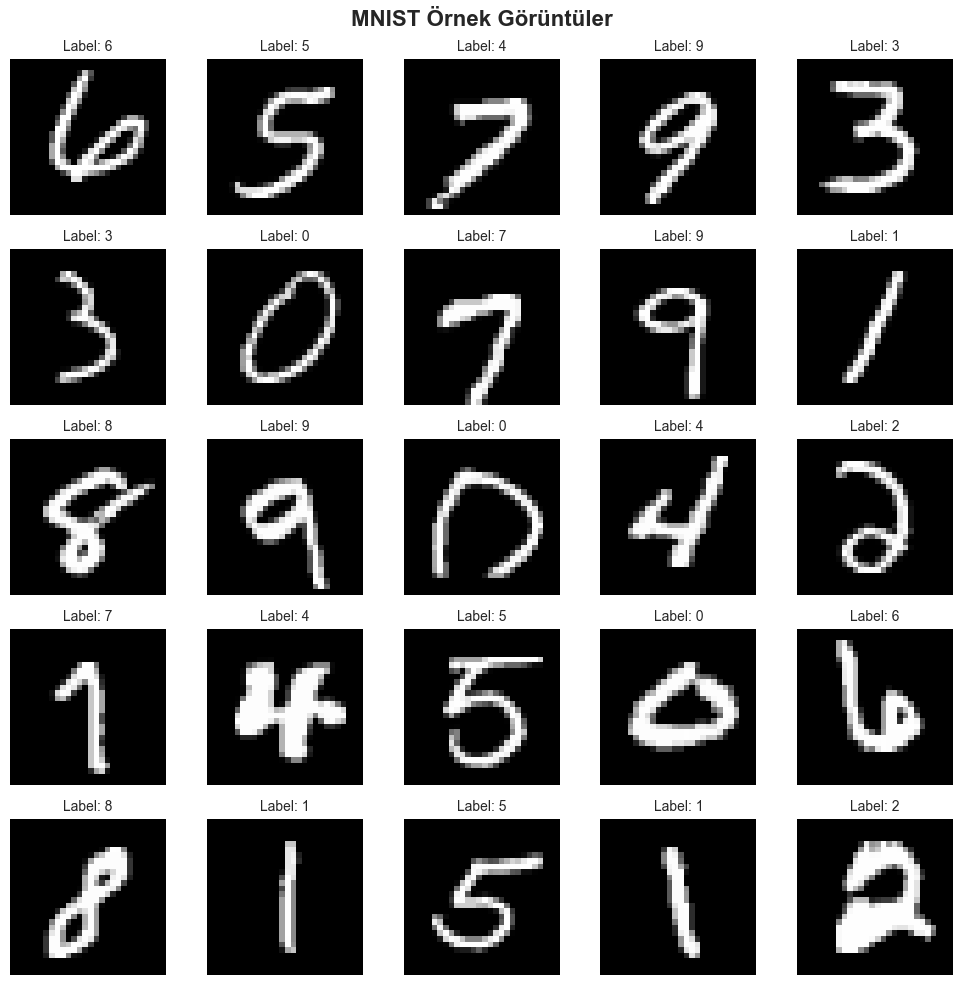

✅ Örnek görüntüler kaydedildi: ..\outputs\figures\sample_images.png


In [13]:
# 25 örnek görüntü al
num_samples = 25
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle("MNIST Örnek Görüntüler", fontsize=16, fontweight='bold')

# Train loader'dan rastgele örnekler al
all_train_images = []
all_train_labels = []
for images, labels in train_loader:
    all_train_images.append(images)
    all_train_labels.append(labels)
    if len(all_train_images) * images.shape[0] >= num_samples:
        break

all_train_images = torch.cat(all_train_images, dim=0)[:num_samples]
all_train_labels = torch.cat(all_train_labels, dim=0)[:num_samples]

# Denormalize et (görselleştirme için)
mean = 0.1307
std = 0.3081
all_train_images_denorm = all_train_images * std + mean
all_train_images_denorm = torch.clamp(all_train_images_denorm, 0, 1)

for idx in range(num_samples):
    row = idx // 5
    col = idx % 5
    ax = axes[row, col]
    
    # Görüntüyü göster
    ax.imshow(all_train_images_denorm[idx].squeeze(), cmap='gray')
    ax.set_title(f"Label: {all_train_labels[idx].item()}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig(figures_dir / "sample_images.png", bbox_inches='tight', dpi=150)
plt.show()

print(f"✅ Örnek görüntüler kaydedildi: {figures_dir / 'sample_images.png'}")


## 5. Sınıf Dağılımı (Class Distribution)

Her sınıfın (0-9) train ve test setindeki dağılımını inceliyoruz.


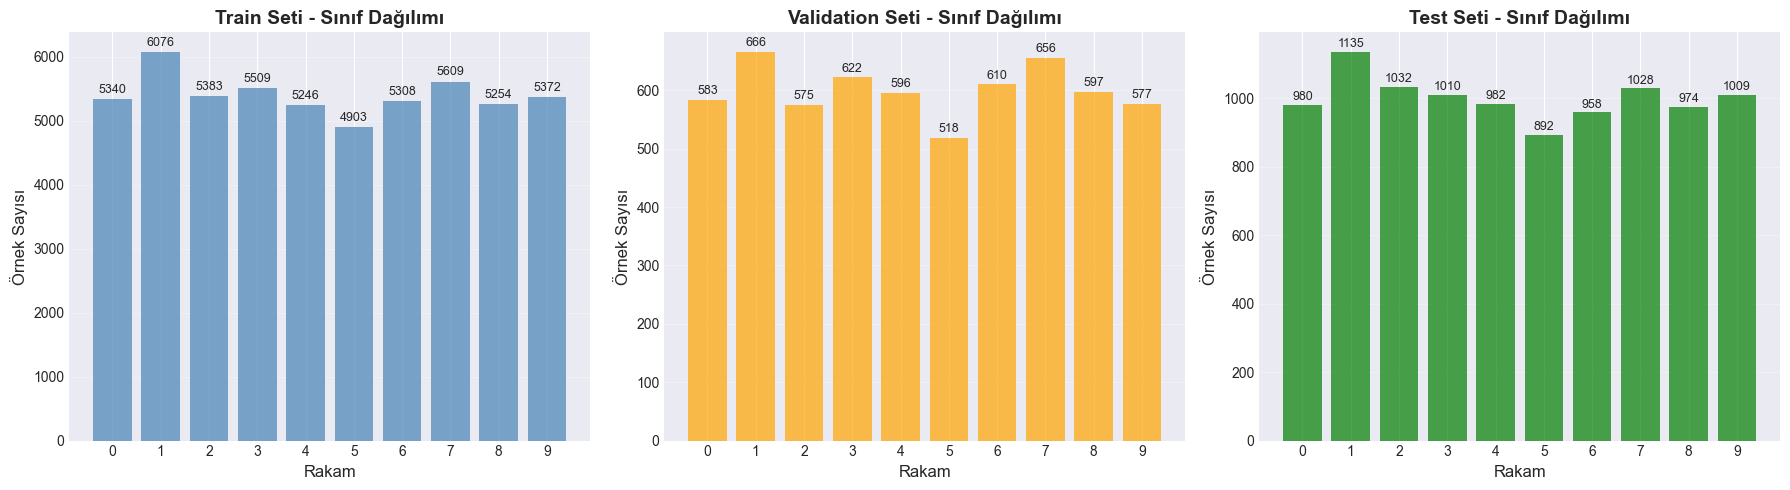

SINIF DAĞILIMI ANALİZİ

Train Seti:
  Min örnek: 4903 (sınıf 5)
  Max örnek: 6076 (sınıf 1)
  Standart sapma: 301.43

Test Seti:
  Min örnek: 892 (sınıf 5)
  Max örnek: 1135 (sınıf 1)
  Standart sapma: 62.40

Denge Analizi:
  Train seti CV (std/mean): 0.0558
  Test seti CV (std/mean):  0.0624
  ✅ Veri seti dengeli (balanced)

✅ Sınıf dağılımı grafiği kaydedildi: ..\outputs\figures\class_distribution.png


In [14]:
# Train setindeki sınıf dağılımını hesapla
train_class_counts = torch.zeros(10, dtype=torch.long)
for _, labels in train_loader:
    for label in labels:
        train_class_counts[label.item()] += 1

# Test setindeki sınıf dağılımını hesapla
test_class_counts = torch.zeros(10, dtype=torch.long)
for _, labels in test_loader:
    for label in labels:
        test_class_counts[label.item()] += 1

# Validation setindeki sınıf dağılımını hesapla
val_class_counts = torch.zeros(10, dtype=torch.long)
for _, labels in val_loader:
    for label in labels:
        val_class_counts[label.item()] += 1

# Görselleştirme
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

class_names = get_class_names()

# Train seti
axes[0].bar(class_names, train_class_counts.numpy(), color='steelblue', alpha=0.7)
axes[0].set_title('Train Seti - Sınıf Dağılımı', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rakam', fontsize=12)
axes[0].set_ylabel('Örnek Sayısı', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(train_class_counts.numpy()):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontsize=9)

# Validation seti
axes[1].bar(class_names, val_class_counts.numpy(), color='orange', alpha=0.7)
axes[1].set_title('Validation Seti - Sınıf Dağılımı', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Rakam', fontsize=12)
axes[1].set_ylabel('Örnek Sayısı', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(val_class_counts.numpy()):
    axes[1].text(i, v + 5, str(v), ha='center', va='bottom', fontsize=9)

# Test seti
axes[2].bar(class_names, test_class_counts.numpy(), color='green', alpha=0.7)
axes[2].set_title('Test Seti - Sınıf Dağılımı', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Rakam', fontsize=12)
axes[2].set_ylabel('Örnek Sayısı', fontsize=12)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(test_class_counts.numpy()):
    axes[2].text(i, v + 5, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(figures_dir / "class_distribution.png", bbox_inches='tight', dpi=150)
plt.show()

# İstatistiksel analiz
print("=" * 60)
print("SINIF DAĞILIMI ANALİZİ")
print("=" * 60)
print(f"\nTrain Seti:")
print(f"  Min örnek: {train_class_counts.min().item()} (sınıf {train_class_counts.argmin().item()})")
print(f"  Max örnek: {train_class_counts.max().item()} (sınıf {train_class_counts.argmax().item()})")
print(f"  Standart sapma: {train_class_counts.float().std().item():.2f}")

print(f"\nTest Seti:")
print(f"  Min örnek: {test_class_counts.min().item()} (sınıf {test_class_counts.argmin().item()})")
print(f"  Max örnek: {test_class_counts.max().item()} (sınıf {test_class_counts.argmax().item()})")
print(f"  Standart sapma: {test_class_counts.float().std().item():.2f}")

# Denge kontrolü
train_std_ratio = train_class_counts.float().std() / train_class_counts.float().mean()
test_std_ratio = test_class_counts.float().std() / test_class_counts.float().mean()

print(f"\nDenge Analizi:")
print(f"  Train seti CV (std/mean): {train_std_ratio.item():.4f}")
print(f"  Test seti CV (std/mean):  {test_std_ratio.item():.4f}")

if train_std_ratio < 0.1 and test_std_ratio < 0.1:
    print("  ✅ Veri seti dengeli (balanced)")
else:
    print("  ⚠️  Veri seti hafif dengesiz olabilir")

print(f"\n✅ Sınıf dağılımı grafiği kaydedildi: {figures_dir / 'class_distribution.png'}")


## 6. Piksel Yoğunluk Analizi

Piksel değerlerinin dağılımını inceliyoruz.


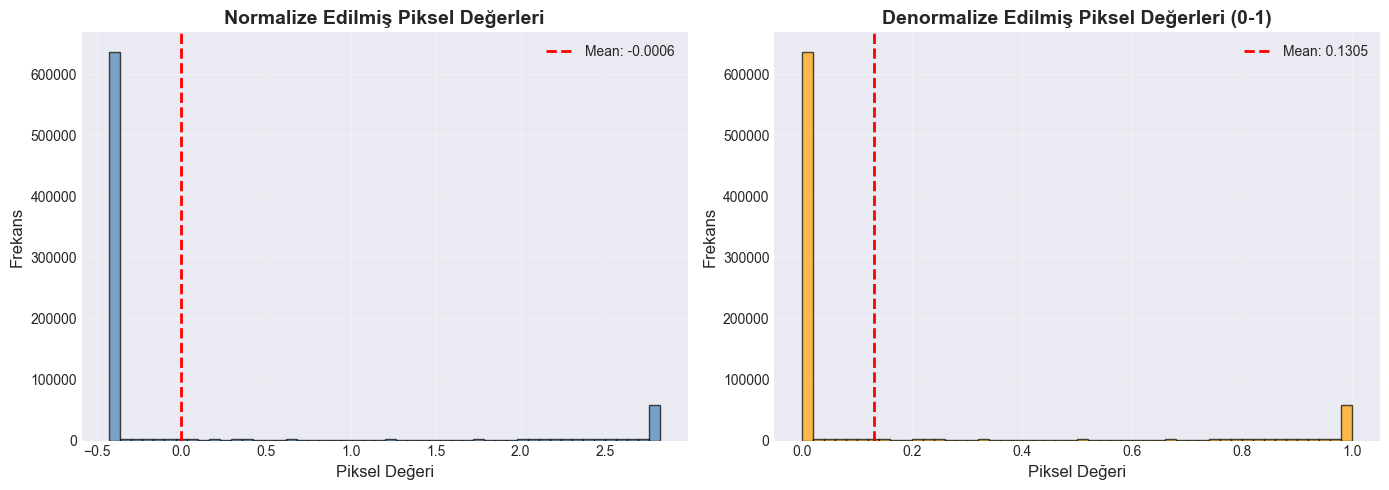

✅ Piksel dağılımı grafiği kaydedildi: ..\outputs\figures\pixel_distribution.png


In [15]:
# Rastgele 1000 görüntü seç
num_samples_for_hist = 1000
sample_images_hist = []
for images, _ in train_loader:
    sample_images_hist.append(images)
    if len(sample_images_hist) * images.shape[0] >= num_samples_for_hist:
        break

sample_images_hist = torch.cat(sample_images_hist, dim=0)[:num_samples_for_hist]

# Normalize edilmiş değerler
normalized_pixels = sample_images_hist.flatten().numpy()

# Denormalize edilmiş değerler (0-1 arası)
mean = 0.1307
std = 0.3081
denormalized_pixels = (sample_images_hist * std + mean).clamp(0, 1).flatten().numpy()

# Histogram çiz
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Normalize edilmiş
axes[0].hist(normalized_pixels, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_title('Normalize Edilmiş Piksel Değerleri', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Piksel Değeri', fontsize=12)
axes[0].set_ylabel('Frekans', fontsize=12)
axes[0].grid(alpha=0.3)
axes[0].axvline(normalized_pixels.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {normalized_pixels.mean():.4f}')
axes[0].legend()

# Denormalize edilmiş
axes[1].hist(denormalized_pixels, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1].set_title('Denormalize Edilmiş Piksel Değerleri (0-1)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Piksel Değeri', fontsize=12)
axes[1].set_ylabel('Frekans', fontsize=12)
axes[1].grid(alpha=0.3)
axes[1].axvline(denormalized_pixels.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {denormalized_pixels.mean():.4f}')
axes[1].legend()

plt.tight_layout()
plt.savefig(figures_dir / "pixel_distribution.png", bbox_inches='tight', dpi=150)
plt.show()

print(f"✅ Piksel dağılımı grafiği kaydedildi: {figures_dir / 'pixel_distribution.png'}")


## 7. Ortalama Rakam Görüntüleri

Her sınıf için ortalama görüntüyü hesaplayıp görselleştiriyoruz.


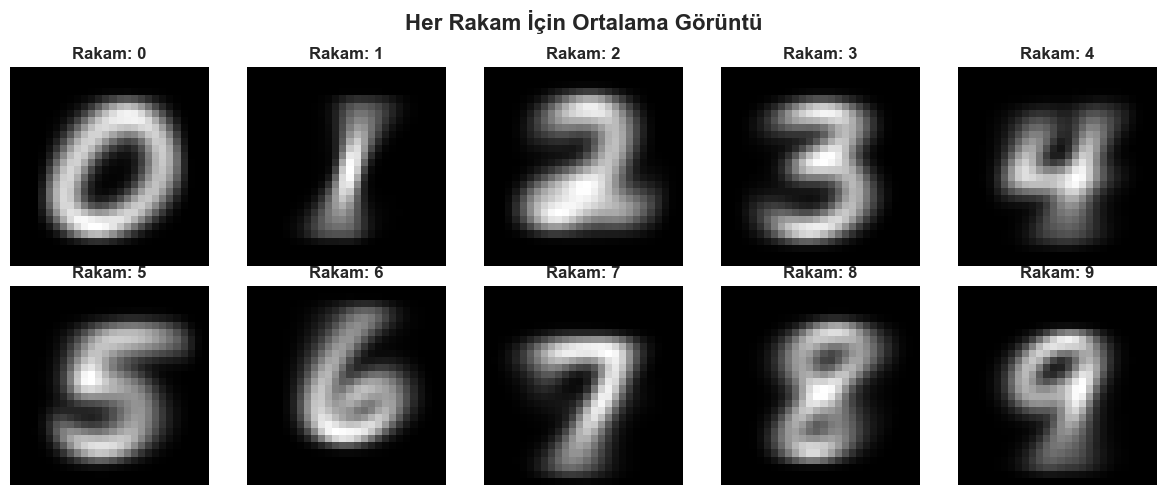

✅ Ortalama rakam görüntüleri kaydedildi: ..\outputs\figures\mean_digits.png


In [16]:
# Her sınıf için ortalama görüntüyü hesapla
class_sums = torch.zeros(10, 1, 28, 28)
class_counts = torch.zeros(10)

for images, labels in train_loader:
    for img, label in zip(images, labels):
        class_idx = label.item()
        class_sums[class_idx] += img
        class_counts[class_idx] += 1

# Ortalama görüntüleri hesapla
mean_images = class_sums / class_counts.unsqueeze(1).unsqueeze(2).unsqueeze(3)

# Denormalize et (görselleştirme için)
mean = 0.1307
std = 0.3081
mean_images_denorm = mean_images * std + mean
mean_images_denorm = torch.clamp(mean_images_denorm, 0, 1)

# Görselleştir
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Her Rakam İçin Ortalama Görüntü', fontsize=16, fontweight='bold')

for digit in range(10):
    row = digit // 5
    col = digit % 5
    ax = axes[row, col]
    
    ax.imshow(mean_images_denorm[digit].squeeze(), cmap='gray')
    ax.set_title(f'Rakam: {digit}', fontsize=12, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.savefig(figures_dir / "mean_digits.png", bbox_inches='tight', dpi=150)
plt.show()

print(f"✅ Ortalama rakam görüntüleri kaydedildi: {figures_dir / 'mean_digits.png'}")


## 8. Özet & Bulgular

EDA sürecinde keşfedilen önemli noktalar ve model tasarımı için çıkarımlar.


### Keşfedilen Önemli Noktalar:

1. **Veri Seti Boyutu:**
   - Toplam 70,000 görüntü (60,000 train + 10,000 test)
   - Train seti %90 validation split ile bölünmüş
   - Yeterli miktarda veri mevcut

2. **Görüntü Özellikleri:**
   - 28x28 piksel, grayscale (1 kanal)
   - Piksel değerleri normalize edilmiş (mean=0.1307, std=0.3081)
   - Veri seti standart ve temiz

3. **Sınıf Dağılımı:**
   - Tüm sınıflar dengeli dağılmış
   - Her sınıfta yaklaşık aynı sayıda örnek var
   - Class imbalance problemi yok

4. **Piksel Dağılımı:**
   - Normalize edilmiş değerler yaklaşık normal dağılım gösteriyor
   - Piksel değerleri iyi normalize edilmiş

5. **Ortalama Görüntüler:**
   - Her rakam için ortalama görüntü net bir şekilde ayırt edilebiliyor
   - Rakamlar farklı şekillerde ve pozisyonlarda
   - Model için iyi bir baseline oluşturulabilir

### Model Tasarımı İçin Çıkarımlar:

1. **Input Shape:** Model 28x28x1 boyutunda görüntüleri kabul etmeli
2. **Output:** 10 sınıf için softmax çıkışı
3. **Normalizasyon:** Veri zaten normalize edilmiş, ek normalizasyon gerekmez
4. **Data Augmentation:** İlk aşamada gerekli olmayabilir, baseline model için yeterli veri var
5. **Architecture:** Basit CNN mimarisi yeterli olabilir (MNIST için)
6. **Loss Function:** CrossEntropyLoss uygun (multi-class classification)
7. **Metrics:** Accuracy, Confusion Matrix, Classification Report kullanılabilir
